In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
cd "C:\Users\aijul\Desktop\dataScience-\Real_Estate_Project\dataset"

C:\Users\aijul\Desktop\dataScience-\Real_Estate_Project\dataset


In [92]:
pd.set_option('display.max_columns', None)

In [93]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [94]:
df.shape

(3677, 23)

In [95]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sector 47,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,1,0


<AxesSubplot:xlabel='price'>

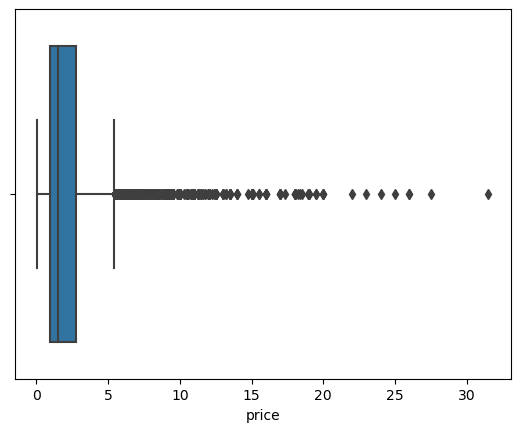

In [96]:
sns.boxplot(x=df['price'])

In [97]:
#calculate the IQR for the price
Q1 =df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
#define bound for outliers
lower_bound = Q1 -1.5* IQR
upper_bound = Q3 + 1.5*IQR

#identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

#display the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [98]:
outliers.sort_values('price', ascending= False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3716,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
3486,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
3477,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
3519,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
3655,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
3442,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
3641,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
3460,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
2948,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
3435,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153


### price_per_sqft 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

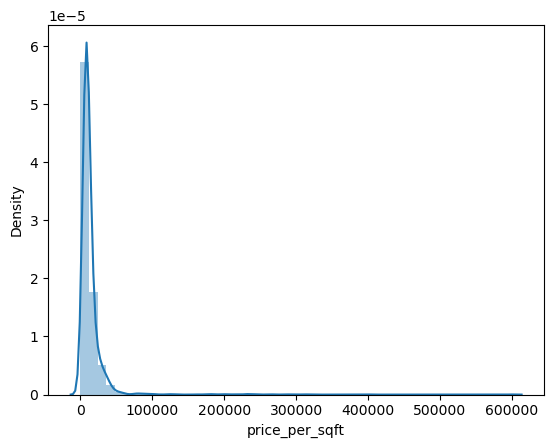

In [99]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

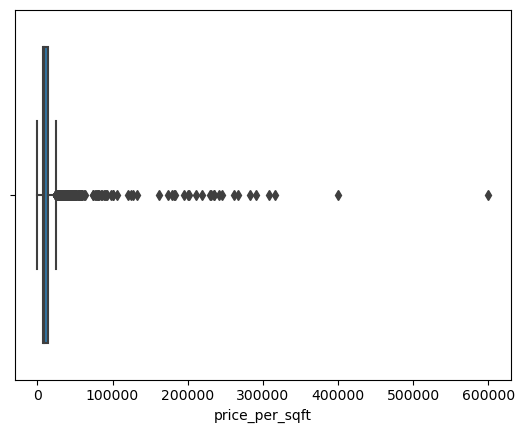

In [100]:
sns.boxplot(x=df['price_per_sqft'])

In [101]:
#calculate the IQR for the price
Q1 =df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
#define bound for outliers
lower_bound = Q1 -1.5* IQR
upper_bound = Q3 + 1.5*IQR

#identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

#display the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price_per_sqft'].describe()

num_outliers, outliers_price_stats

(425,
 count       425.000000
 mean      36456.475294
 std       51784.501266
 min        1560.000000
 25%       19488.000000
 50%       26389.000000
 75%       35222.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [102]:
#area
outliers_sqft['area']  = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x )

C:\Users\aijul\AppData\Local\Temp\ipykernel_5384\359692887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']  = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x )


In [103]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/ outliers_sqft['area'])

C:\Users\aijul\AppData\Local\Temp\ipykernel_5384\1454688452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/ outliers_sqft['area'])


In [104]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [105]:
df.update(outliers_sqft)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

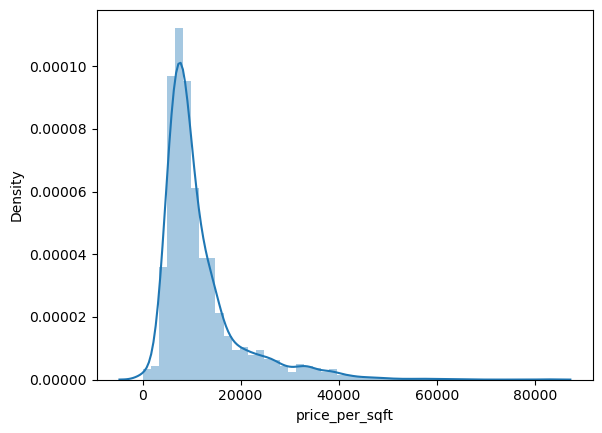

In [106]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

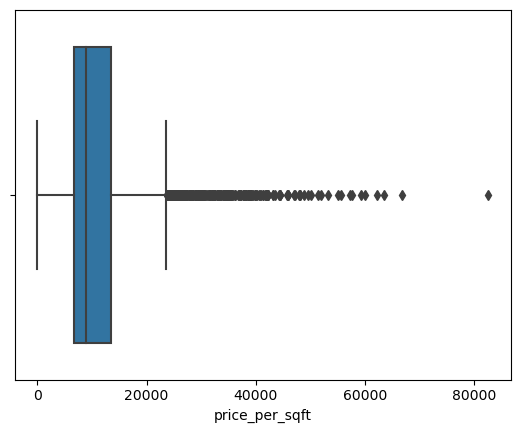

In [107]:
sns.boxplot(x = df['price_per_sqft'])

In [108]:
df[df['price_per_sqft'] > 50000].shape

(13, 23)

In [109]:
df = df[df['price_per_sqft'] <= 50000]

<AxesSubplot:xlabel='price_per_sqft'>

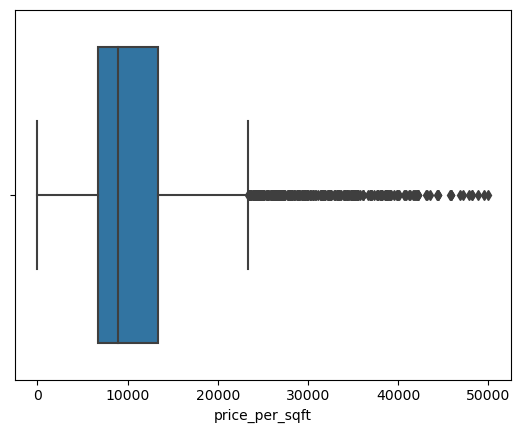

In [110]:
sns.boxplot(x=df['price_per_sqft'])

### area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

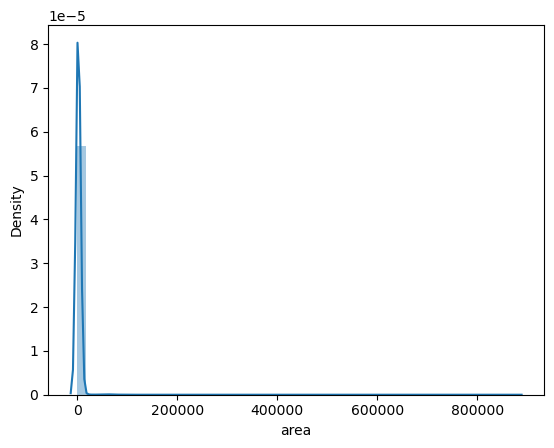

In [111]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

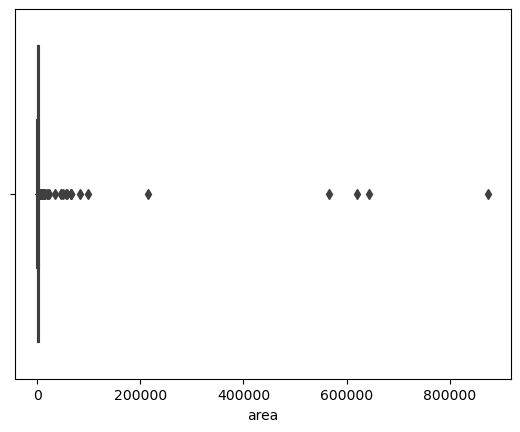

In [112]:
sns.boxplot(x=df['area'])

In [113]:
df['area'].describe()

count      3648.000000
mean       2946.823465
std       23205.039928
min         145.000000
25%        1261.750000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [114]:
df[df['area']> 100000].shape

(5, 23)

In [115]:
df = df[df['area'] < 100000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

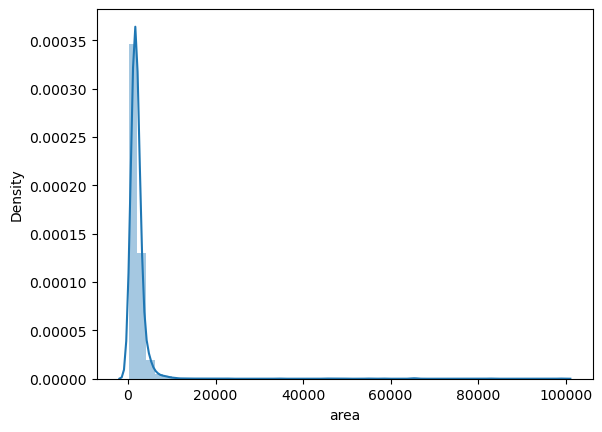

In [116]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

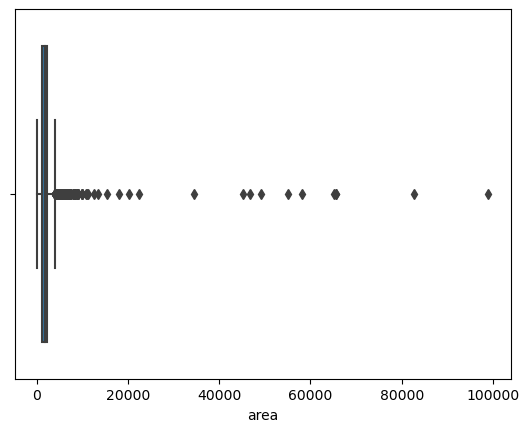

In [117]:
sns.boxplot(x=df['area'])

In [118]:
df[df['area'] > 10000].sort_values('area', ascending= False)
# 3560, 2302, 1292, 78, 1291, 1414, 1288, 1293, 3041

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3560,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,60.0
3223,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
2302,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,1.0,15.0
1292,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,1.0,51.0
3295,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,1.0,15.0
1291,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,1.0,37.0
1414,flat,signature the serenas,sector 47,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,1.0,37.0
3472,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
1288,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,1.0,33.0


In [119]:
df.drop(index = [3560, 2302, 1292, 78, 1291, 1414, 1288, 1293, 3041], inplace=True)

In [120]:
df[df['area']> 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3223,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
3295,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3472,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
3048,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,2.0,61.0
3534,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,2.0,123.0
2397,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,2.0,44.0
3055,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,1.0,160.0
2801,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,1.0,55.0
3486,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0
1621,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [121]:
df.loc[3223,'area'] = 115*9
df.loc[3295,'area'] = 7250
df.loc[3472,'area'] = 5800
df.loc[3048,'area'] = 2660
df.loc[3534,'area'] = 2850
df.loc[2397,'area'] = 1812
df.loc[3055,'area'] = 2160
df.loc[2801,'area'] = 1175

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

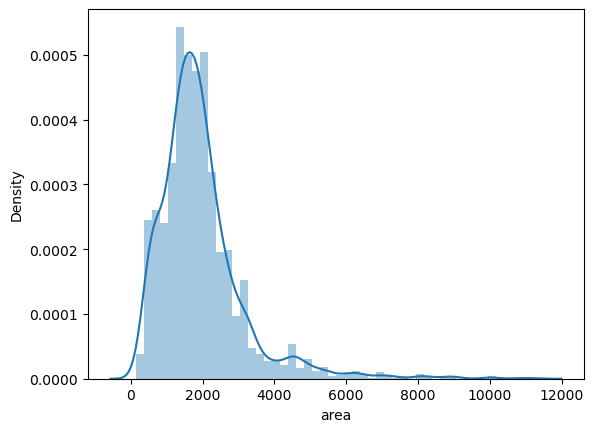

In [122]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

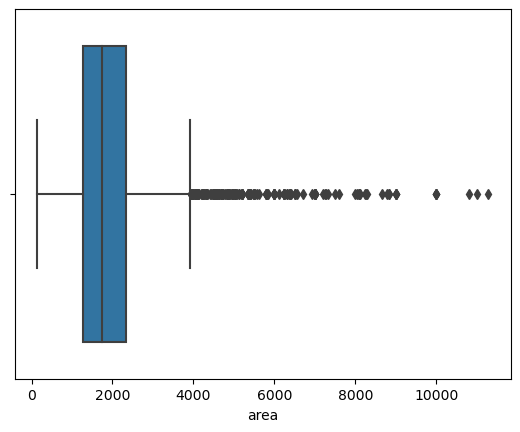

In [123]:
sns.boxplot(x= df['area'])

In [124]:
df['area'].describe()

count     3634.000000
mean      1949.727848
std       1215.445712
min        145.000000
25%       1260.000000
50%       1746.500000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

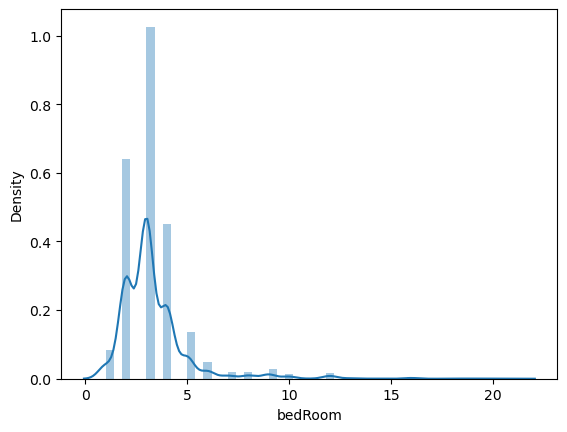

In [125]:
sns.distplot(df['bedRoom'])

In [126]:
df[df['bedRoom']> 10].sort_values('bedRoom', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2944,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,49.0
2946,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,22.0
3403,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,68.0
3069,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,74.0
3651,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,70.0
3049,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,57.0
3669,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
3631,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,49.0
2980,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,41.0
2982,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,49.0


In [127]:
df= df[df['bedRoom'] <= 10]

In [128]:
df.shape

(3589, 23)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

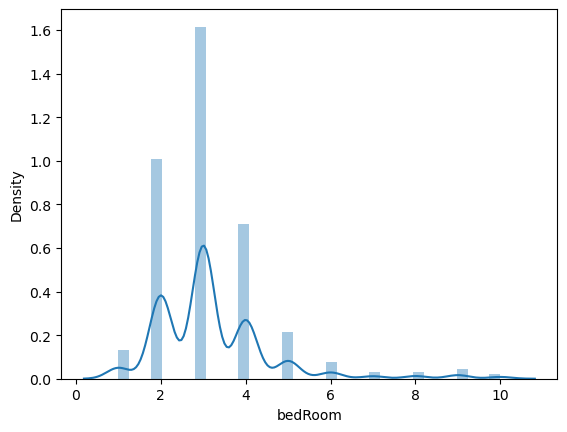

In [129]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

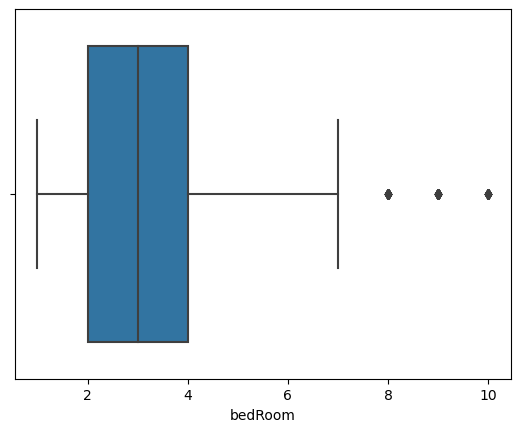

In [130]:
sns.boxplot(x=df['bedRoom'])

In [131]:
df['bedRoom'].describe()

count    3589.000000
mean        3.203678
std         1.393978
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### bathroom

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathroom', ylabel='Density'>

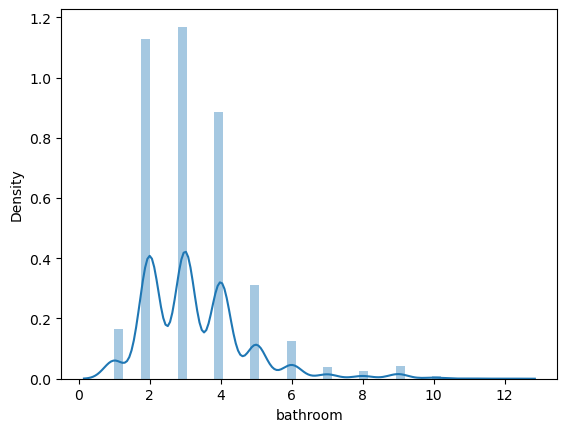

In [132]:
sns.distplot(df['bathroom'])

<AxesSubplot:xlabel='bathroom'>

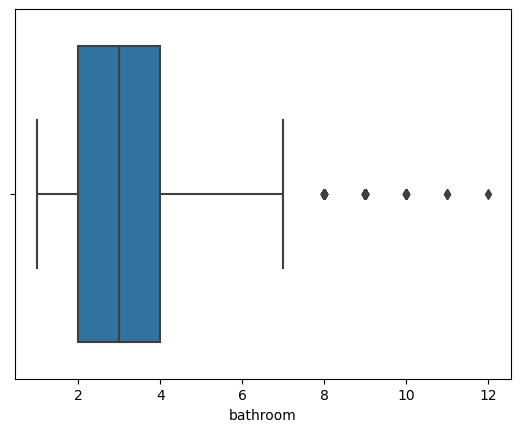

In [133]:
sns.boxplot(x=df['bathroom'])

In [134]:
df[df['bathroom']> 10].sort_values('bathroom', ascending= False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3380,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,146.0
3325,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0
3379,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,39.0


### super built up area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='super_built_up_area', ylabel='Density'>

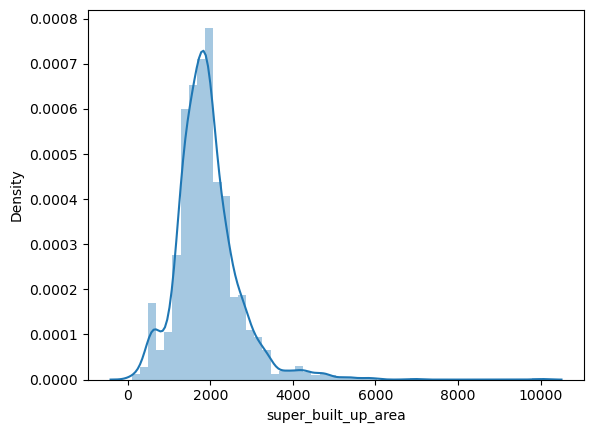

In [135]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot:xlabel='super_built_up_area'>

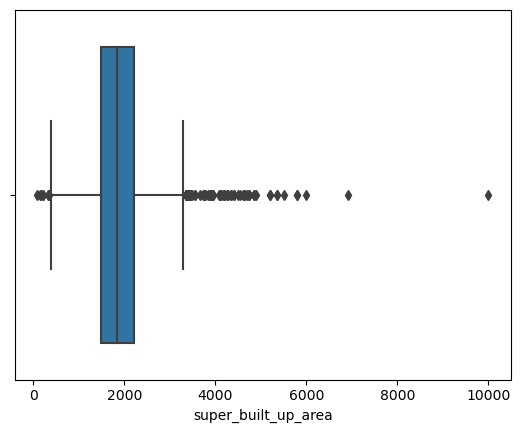

In [136]:
sns.boxplot(x=df['super_built_up_area'])

In [137]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.648293
std        764.274092
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [138]:
df[df['super_built_up_area'] >6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
656,flat,krrish provence estate,sector 58,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0
1527,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0


### built up area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='built_up_area', ylabel='Density'>

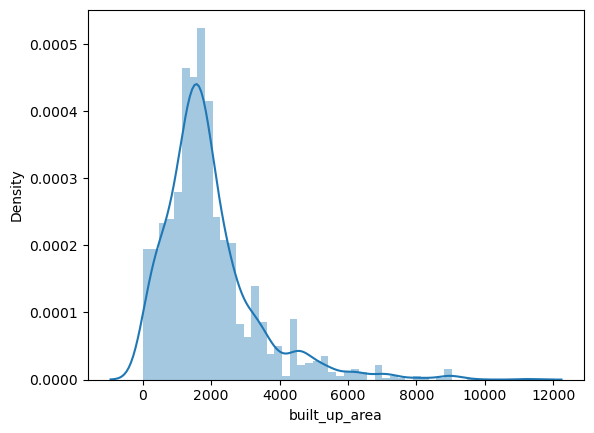

In [139]:
sns.distplot(df['built_up_area'])

<AxesSubplot:xlabel='built_up_area'>

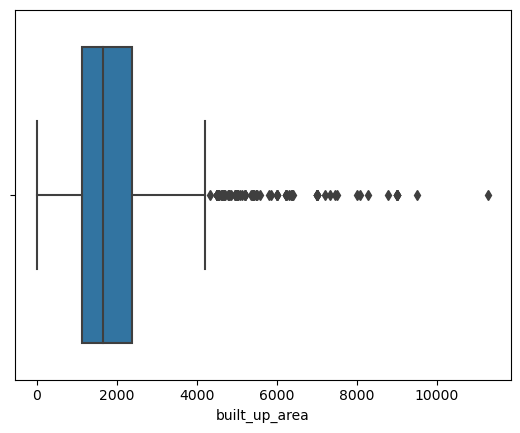

In [140]:
sns.boxplot(x= df['built_up_area'])

In [141]:
df[df['built_up_area']> 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3486,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0


### carpet area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

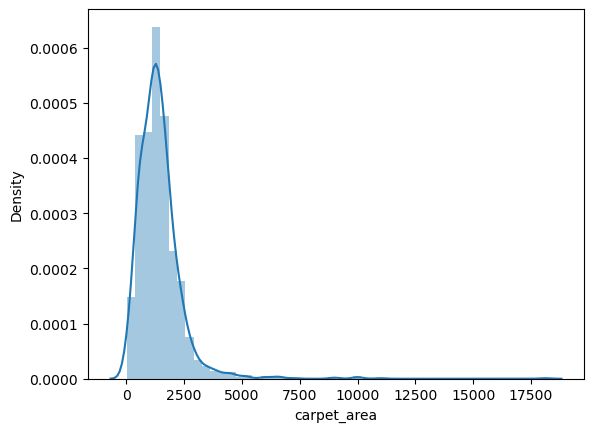

In [142]:
sns.distplot(df['carpet_area'])

<AxesSubplot:xlabel='carpet_area'>

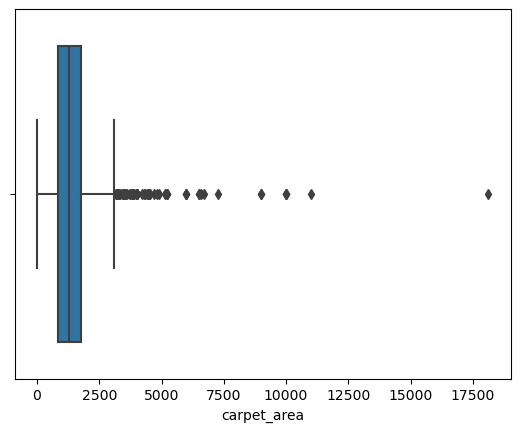

In [143]:
sns.boxplot(x= df['carpet_area'])

In [144]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1621,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0
2397,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0


In [145]:
df.loc[2397, 'carpet_area'] = 1812

In [146]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1621,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [147]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0
2,flat,tulsiani easy in homes,sector 47,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='luxury_score', ylabel='Density'>

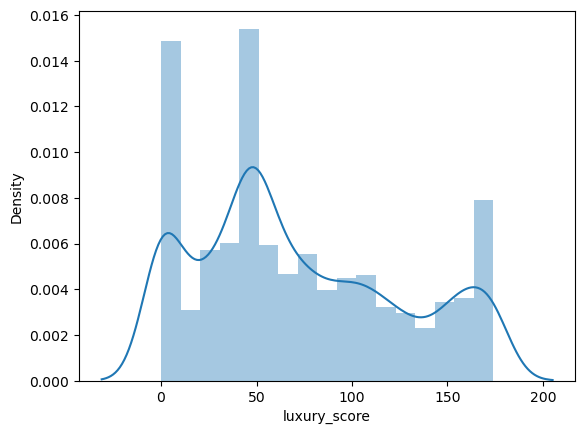

In [148]:
sns.distplot(df['luxury_score'])

<AxesSubplot:xlabel='luxury_score'>

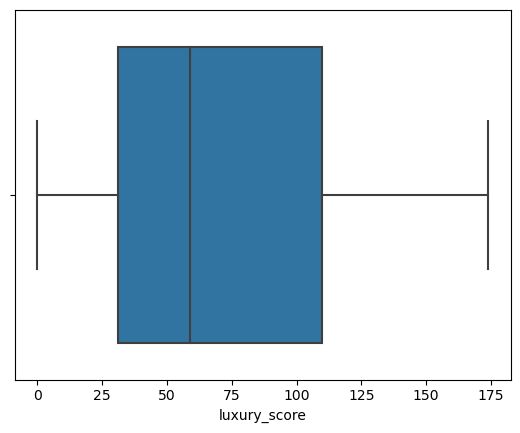

In [149]:
sns.boxplot(x= df['luxury_score'])

In [150]:
df.shape

(3589, 23)

In [151]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [152]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0
2,flat,tulsiani easy in homes,sector 47,0.40,6723.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

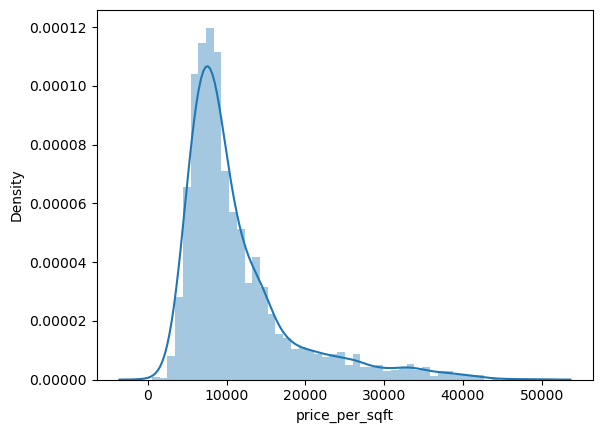

In [153]:
sns.distplot(df['price_per_sqft'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

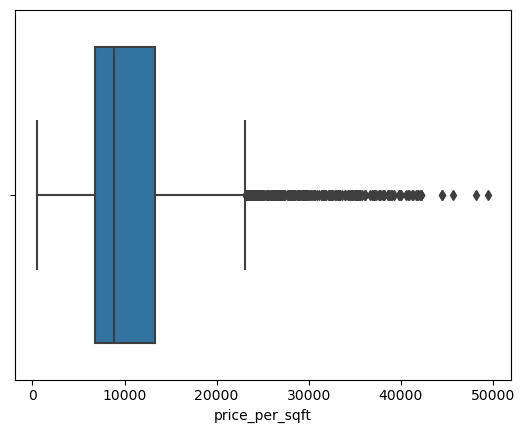

In [154]:
sns.boxplot(df['price_per_sqft'])

In [155]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3353,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3396,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3471,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,121.0
3563,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,2.0,60.0
3569,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,97.0
3650,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0
3665,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,7.0
3679,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,88.0
3784,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0


In [156]:
x= df[df['price_per_sqft'] <= 20000]
(x['area']/ x['bedRoom']).quantile(0.05)

250.5

In [157]:
df[(df['area']/df['bedRoom'])<250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
115,flat,czar mahira homes 63a,sector 63a,0.42,7407.0,567.0,Carpet area: 567 (52.68 sq.m.),3.0,2.0,2,1.0,NaN,Undefined,NaN,NaN,567.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128,flat,mvn athens,sector 47,0.26,5394.0,482.0,Carpet area: 481.74 (44.76 sq.m.),2.0,2.0,1,2.0,NaN,Relatively New,NaN,NaN,481.792164,0.0,0.0,0.0,0.0,0.0,1.0,37.0
197,flat,supertech basera,sector 79,0.36,7643.0,471.0,Built Up area: 546 (50.73 sq.m.)Carpet area: 4...,2.0,2.0,1,4.0,NaN,New Property,NaN,546.0,471.000000,0.0,0.0,0.0,0.0,0.0,1.0,60.0
334,flat,mvn athens,sector 47,0.27,5895.0,458.0,Carpet area: 457.81 (42.53 sq.m.),2.0,2.0,1,4.0,South-East,Relatively New,NaN,NaN,457.788667,0.0,0.0,0.0,0.0,1.0,2.0,35.0
559,flat,signature global solera,sector 107,0.27,5521.0,489.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,0.0,North-East,Relatively New,NaN,NaN,489.000000,0.0,0.0,0.0,0.0,0.0,1.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8.0,8.0,3,4.0,East,Moderately Old,NaN,62.0,60.000000,0.0,0.0,0.0,0.0,1.0,2.0,40.0
3778,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9.0,9.0,3+,3.0,East,Relatively New,NaN,165.0,164.000000,0.0,0.0,0.0,1.0,1.0,2.0,41.0
3784,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.000000,0.0,0.0,0.0,0.0,1.0,2.0,44.0
3787,house,iffco nagar and 17b rwa,sector 17,2.98,20566.0,1449.0,Plot area 161(134.62 sq.m.),6.0,6.0,3+,3.0,East,Relatively New,NaN,1449.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,78.0


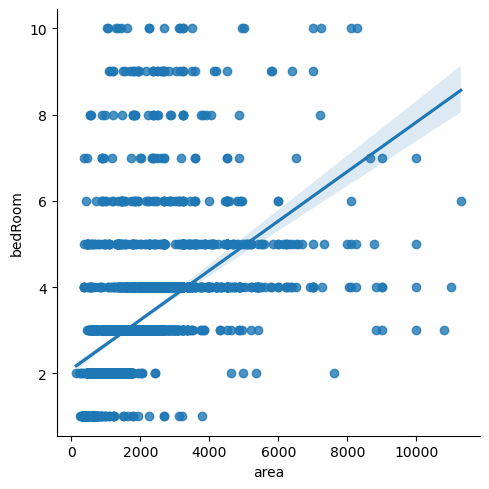

In [158]:
sns.lmplot(data=df, x='area', y= 'bedRoom')

In [159]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [160]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
7.0      8
10.0     8
Name: bedRoom, dtype: int64

In [161]:
df= df[df['area_room_ratio']>100]

In [162]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [163]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/ outliers_df['floorNum'])

C:\Users\aijul\AppData\Local\Temp\ipykernel_5384\2696032634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/ outliers_df['floorNum'])


In [164]:
df.update(outliers_df)

In [165]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [168]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3081,house,independent,sector 2,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222.750000
3089,house,independent,sector 2,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
3091,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,225.000000
3095,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.000000
3142,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.000000
3151,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,29.0,120.600000
3203,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
3229,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
3244,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
3301,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113.000000


In [169]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3081,house,independent,sector 2,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222.750000
3089,house,independent,sector 2,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
3091,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,225.000000
3095,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.000000
3142,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.000000
3151,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,29.0,120.600000
3203,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
3229,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
3244,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
3301,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113.000000


In [170]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [171]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

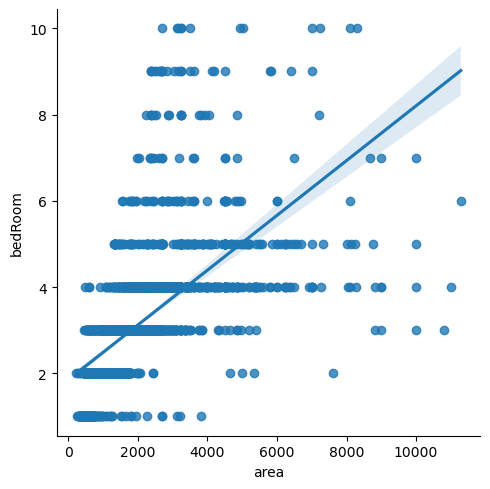

In [172]:
sns.lmplot(data=df, x= 'area', y='bedRoom')

In [173]:
df.shape

(3556, 24)

In [174]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,450.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0,325.0
2,flat,tulsiani easy in homes,sector 47,0.40,6723.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,297.5
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,600.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,672.5


In [175]:
df.to_csv('gurgaon_properties_outliers_treated.csv', index= False)